# **Python: Projeto Final** | Quem gasta mais?

# **Tópicos**

<ol type="1">
  <li>Descrição;</li>
  <li>Importação de bibliotecas;</li>
  <li>Explorando dados;</li>
  <li>Tratamento de dados e limpeza;</li>
  <li>Análise e insights.</li>
</ol>


## 1. Descrição

## 2. Importanto bibliotecas

Vamos importar as bibliotecas a serem utilizadas no projeto

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
sns.set_style("whitegrid")

## 3. Explorando os dados

### 3.1 Estrutura

Utilizaremos o Pandas para criar o DataFrame e poder verificar a base de dados mais detalhadamente


In [3]:
df = pd.read_csv('./Python_M10_support material.csv', na_values='na')

In [4]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Usando o método head e atribuindo o valor desejado, podemos ver o DataFrame. Logo, vamos usar o atributo shape para verificar quantas linhas e colunas o nosso DataFrame possui. Abaixo, uma visão detalhada com o nome das colunas e suas descrições.

In [5]:
df.shape 

(10127, 16)

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

### 3.2 Schema

Vamos verificar os tipos de cada coluna

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Verificando mais detalhadamente o tipo 'Object' no DataFrame.

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


É notável que salario_anual, limite_credito e valor_transacoes_12m constam como 'Object'. Agora, vamos verificar os atributos numéricos.

In [8]:
df.drop('id', axis = 1 ).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


O 'id' não é necessário como um tipo numérico, por isso foi removido dessa visualização. Aqui, podemos ter uma noção de quais colunas podemos trabalhar e quais estão faltando nessa seleção

### 3.2 Dados Faltantes

Vamos verificar os dados faltantes que podem ser:
 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [9]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Podemos ver que só as colunas escolaridades, estado_civil e salario_anual contém valores vazios ('na').

## 4. Tratamento de dados e limpeza

### 4.1 Correção de schema

Como vimos que algumas colunas não estão no formato correto para realizarmos a análise como limite_credito e valor_transacoes_12m , vamos corrigir isso para uma análise mais precisa.

In [10]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [11]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função lambda e aplicar no nosso dataframe.

In [12]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Vamos verificar o tipo dessas colunas novamente e o dataframe

In [13]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [14]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [15]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [16]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 4.2 Removendo os dados faltantes

Vamos verificar a quantidade de linhas e colunas do DataFrame.

In [17]:
df.shape

(10127, 16)

Sabendo da existência de dados faltantes, vamos removê-los do DataFrame e verificar a quantidade de linhas que sobraram.

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(7081, 16)

# 5. Análise e insights.

In [20]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


In [21]:
df[['tipo_cartao']].value_counts()

tipo_cartao
blue           6598
silver          391
gold             81
platinum         11
Name: count, dtype: int64

In [22]:
df[['estado_civil']].value_counts()

estado_civil
casado          3564
solteiro        2948
divorciado       569
Name: count, dtype: int64

In [24]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


In [25]:
df_casado = df[df['estado_civil'] == 'casado']
df_divorciado = df[df['estado_civil'] == 'divorciado']
df_solteiro = df[df['estado_civil'] == 'solteiro']


In [ ]:

#df_to_plot = df_solteiro['tipo_cartao'].value_counts().to_frame(name='frequencia_absoluta')
##df_to_plot

C:\Users\jhon\AppData\Local\Temp\ipykernel_6676\2908344997.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


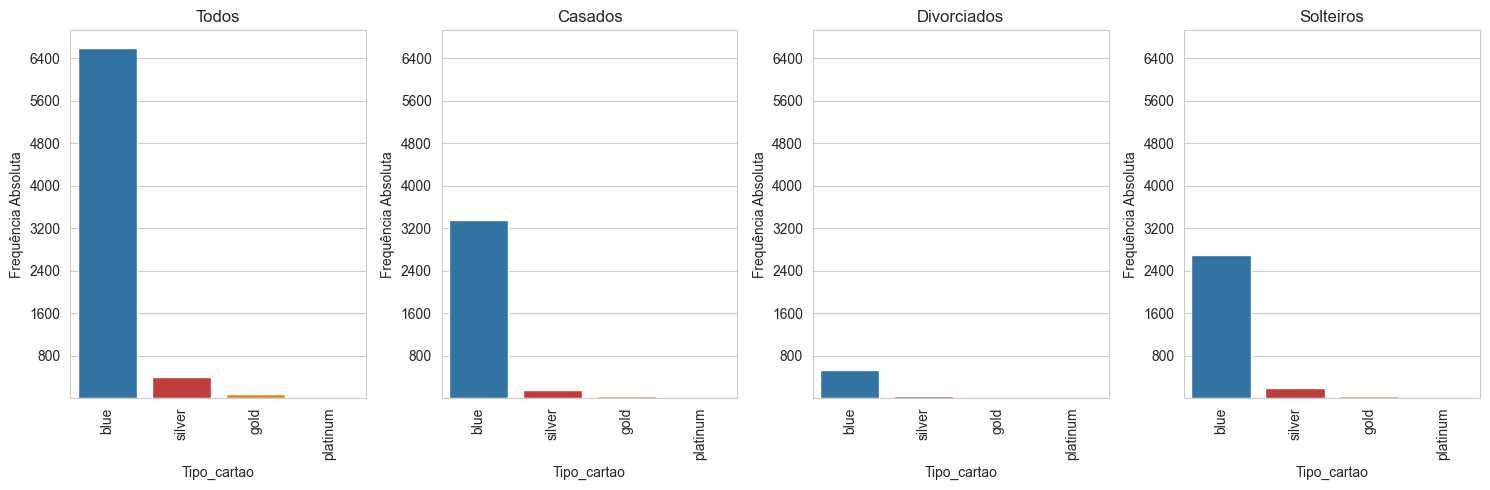

In [52]:
coluna = 'tipo_cartao'
titulos = ['Todos', 'Casados', 'Divorciados', 'Solteiros']
cores = {
    'blue': '#1f77b4',  # Cor para 'blue'
    'silver': '#d62728',  # Cor para 'silver'
    'gold': '#ff7f0e',  # Cor para 'gold'
    'platinum': '#2ca02c'  # Cor para 'platinium'
}

eixo = 0
max_y = 0
min_y = 0
max_t = df[coluna].value_counts().max() * 1.1

figura, eixos = plt.subplots(1,4, figsize=(15, 5), sharex=True)

for dataframe, titulo in zip([df, df_casado, df_divorciado, df_solteiro], titulos):

  df_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
  df_to_plot.reset_index(inplace=True)
  df_to_plot.rename(columns={'index': coluna}, inplace=True)
  
 
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette= cores)
  
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

 
  eixo_y = eixos[eixo].yaxis
  eixo_y.set_major_locator(MaxNLocator(integer=True, prune='lower'))

  min_y_f, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  min_y = min_y_f if min_y_f > min_y else min_y
  f.set(ylim=(0, max_y))
  

  eixo += 1

figura.tight_layout()
figura.show()

In [ ]:
df.sort_values(by='valor_transacoes_12m', ascending=False	)

In [28]:
soma_estado_civil = df.groupby('estado_civil')['valor_transacoes_12m'].sum().reset_index()
soma_estado_civil

,estado_civil,valor_transacoes_12m
0,casado,14844950.09
1,divorciado,2627743.28
2,solteiro,13646890.17


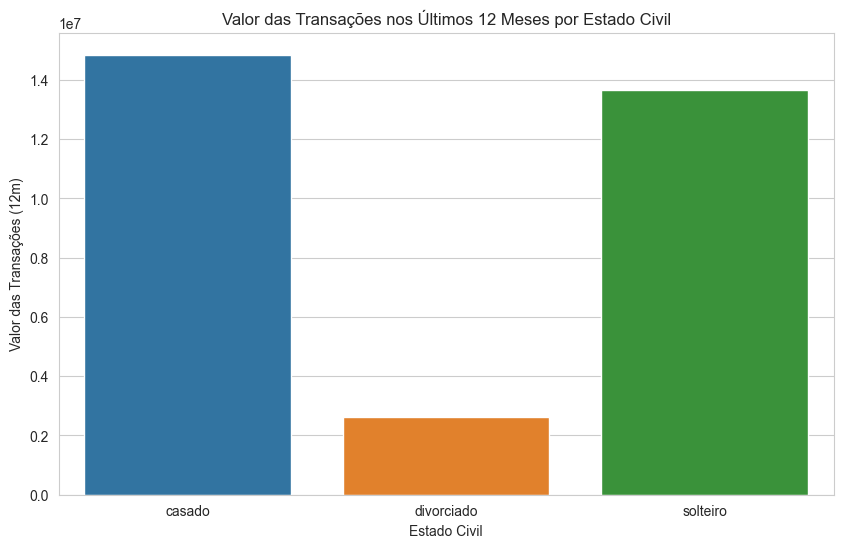

In [30]:

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=soma_estado_civil, x='estado_civil', y='valor_transacoes_12m')
plt.title('Valor das Transações nos Últimos 12 Meses por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Valor das Transações (12m)')
plt.show()